In [107]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
pd.options.display.max_columns = None

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt


In [108]:
df = pd.read_csv('train.csv')

In [109]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [111]:
# remove whitespace
df = df.rename(columns= lambda x: x.strip(), inplace=False)

In [112]:
# dropping duplicate records
df = df.drop_duplicates()

In [113]:
# Check null values 
missing_val_cols_prcnt = round(100*df.isnull().sum()/len(df.index),2)
missing = pd.DataFrame(missing_val_cols_prcnt[missing_val_cols_prcnt!=0])
missing.sort_values(0,ascending=False)

,0
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageType,5.55
GarageYrBlt,5.55
GarageFinish,5.55
GarageQual,5.55


In [114]:
# Inspecting null values in the categorical columns (only object types).

cat_cols = df.select_dtypes(include='object') 
missing_cat_obj_null_prcnt = round(100*cat_cols.isnull().sum()/len(cat_cols.index),2)\
   .reset_index(name='percentage')
missing_cat_obj_null_prcnt = missing_cat_obj_null_prcnt[missing_cat_obj_null_prcnt['percentage']!=0]
missing_cat_obj_null_prcnt = missing_cat_obj_null_prcnt.sort_values('percentage',ascending=False)
missing_cat_obj_null_prcnt

,index,percentage
38,PoolQC,99.52
40,MiscFeature,96.30
2,Alley,93.77
39,Fence,80.75
32,FireplaceQu,47.26
33,GarageType,5.55
34,GarageFinish,5.55
35,GarageQual,5.55
36,GarageCond,5.55
23,BsmtExposure,2.60


In [115]:
##Considering the aspect of 'meaningful missing'. Replace nulls with 'None' where null implies absence of feature (from data dictionary)

cat_null_cols = missing_cat_obj_null_prcnt['index'].to_list()

for column in cat_null_cols:
    df[column]= df[column].fillna('None')

In [116]:

numeric_cols = df.select_dtypes(include=['int64','float64','int32','float32'])   #Retaining only int and float data types for numeric columns
missing_numeric_null_prcnt = round(100*numeric_cols.isnull().sum()/len(numeric_cols.index),2)\
   .reset_index(name='percentage')
missing_numeric_null_prcnt = missing_numeric_null_prcnt[missing_numeric_null_prcnt['percentage']!=0]
missing_numeric_null_prcnt = missing_numeric_null_prcnt.sort_values('percentage',ascending=False)
missing_numeric_null_prcnt

,index,percentage
2,LotFrontage,17.74
25,GarageYrBlt,5.55
8,MasVnrArea,0.55


In [117]:
##Impute the null values with median values for 'LotFrontage' and 'MasVnrArea' columns

df['LotFrontage'] = df['LotFrontage'].replace(np.nan, df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].replace(np.nan, df['MasVnrArea'].median())

##Filling the null values with 0 for 'GarageYrBlt' for now as we would be handling this column further below

df['GarageYrBlt']= df['GarageYrBlt'].fillna(0)
df['GarageYrBlt'] = df['GarageYrBlt'].astype(int) 

In [118]:

numeric_null_cols = df.select_dtypes(include=['int64','float64','int32','float32'])   #Retaining only int and float data types for numeric columns
missing_numeric_null_prcnt = round(100*numeric_null_cols.isnull().sum()/len(numeric_null_cols.index),2)
missing_numeric_null_prcnt = missing_numeric_null_prcnt[missing_numeric_null_prcnt!=0]
missing_numeric_null_prcnt

Series([], dtype: float64)

### No null values are present in the numeric columns of the dataset, df

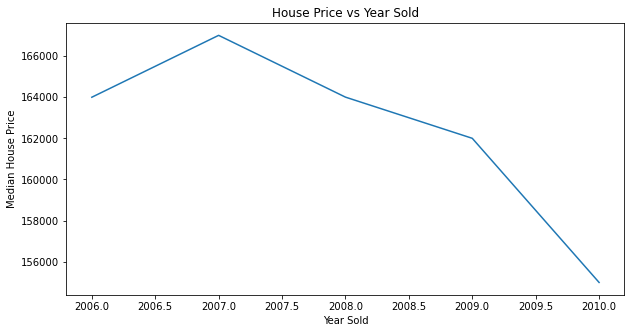

In [119]:
# checking median price of houses over the years
plt.figure(figsize=(10,5))
df['YrSold'] = df['YrSold'].astype('int')
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs Year Sold")
plt.show()


List of features with Year are:
['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


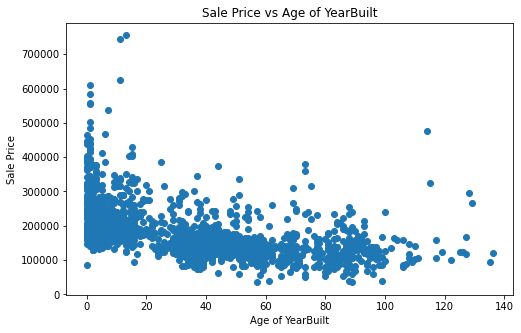

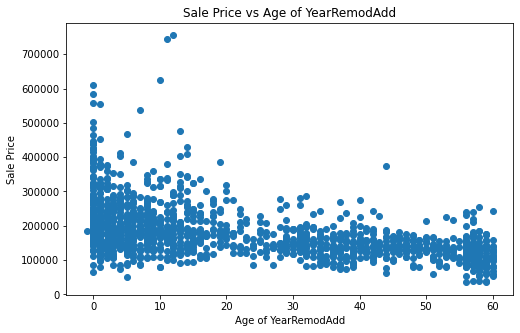

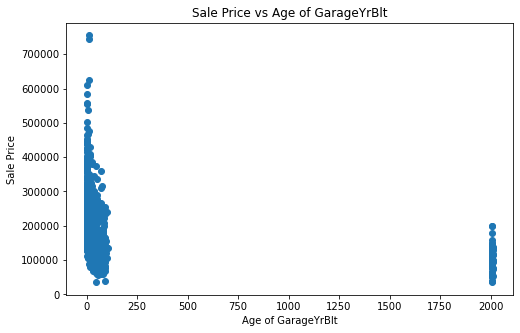

In [120]:
# Extracting features with 'Year', 'year', 'Yr', or 'yr' in their names
yr_cols = [col for col in df.columns if any(keyword in col.lower() for keyword in ['year', 'yr'])]
print('List of features with Year are:')
print(yr_cols)

for feature in yr_cols:
    if feature != 'YrSold':
        data = df.copy()
        data[feature] = data['YrSold'] - data[feature]  
        plt.figure(figsize=(8,5))
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(f"Age of {feature}")  # Add feature-specific label
        plt.ylabel('Sale Price')
        plt.title(f"Sale Price vs Age of {feature}")  # Add plot title
        plt.show()


In [121]:
df.drop('Id', axis=1, inplace=True)

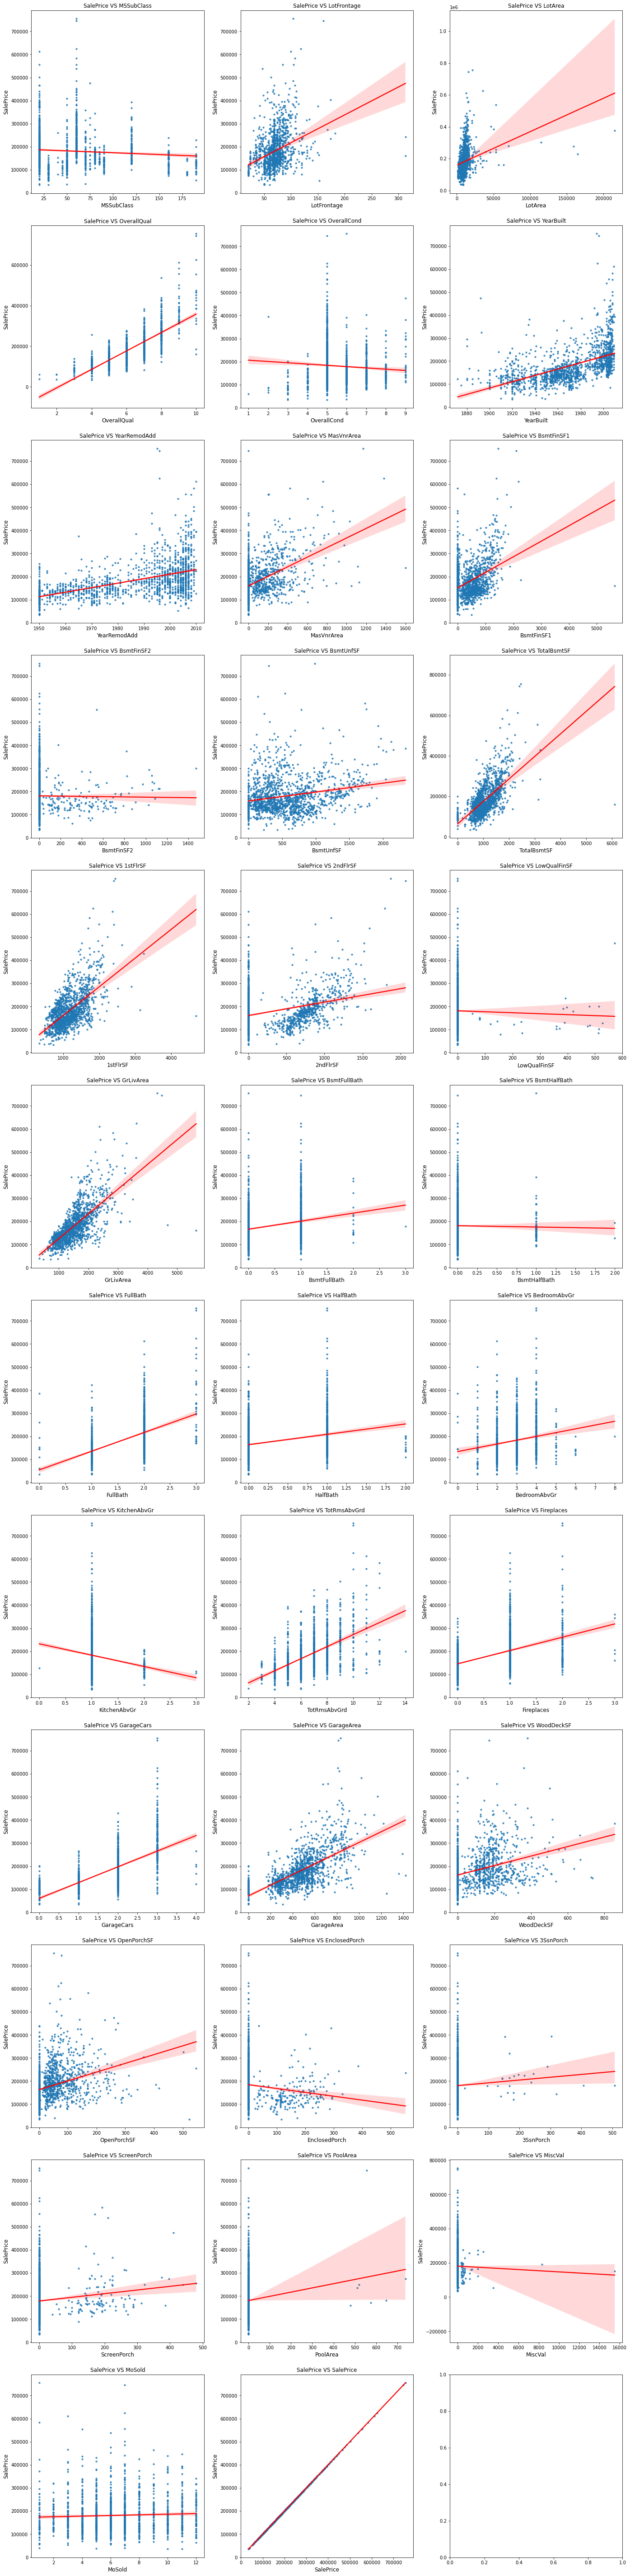

In [122]:
import seaborn as sns

# Selecting numerical columns
df_num = df.select_dtypes(include=['int64', 'float64'])

# Setting up subplot layout
fig, axs = plt.subplots(12, 3, figsize=(20, 80))
fig.tight_layout(pad=5.0)  # Adjust layout for better spacing

# Loop through numerical columns
for i, ax in zip(df_num.columns, axs.flatten()):
    sns.regplot(x=i, y='SalePrice', data=df_num, ax=ax, scatter_kws={'s': 10}, line_kws={'color': 'red'})
    ax.set_xlabel(i, fontsize=12)
    ax.set_ylabel('SalePrice', fontsize=12)
    ax.set_title('SalePrice' + ' VS ' + str(i))

# Display the plot
plt.show()



### Observations from the above plot:-

- New properties are costlier than older properties.
- GRLiving Area has a direct corelation with the proce of the property.
- Total basement area, which is linearly related with the total living area, also is directly proportional to the price of the property.
- Month sold has no effect on the price.

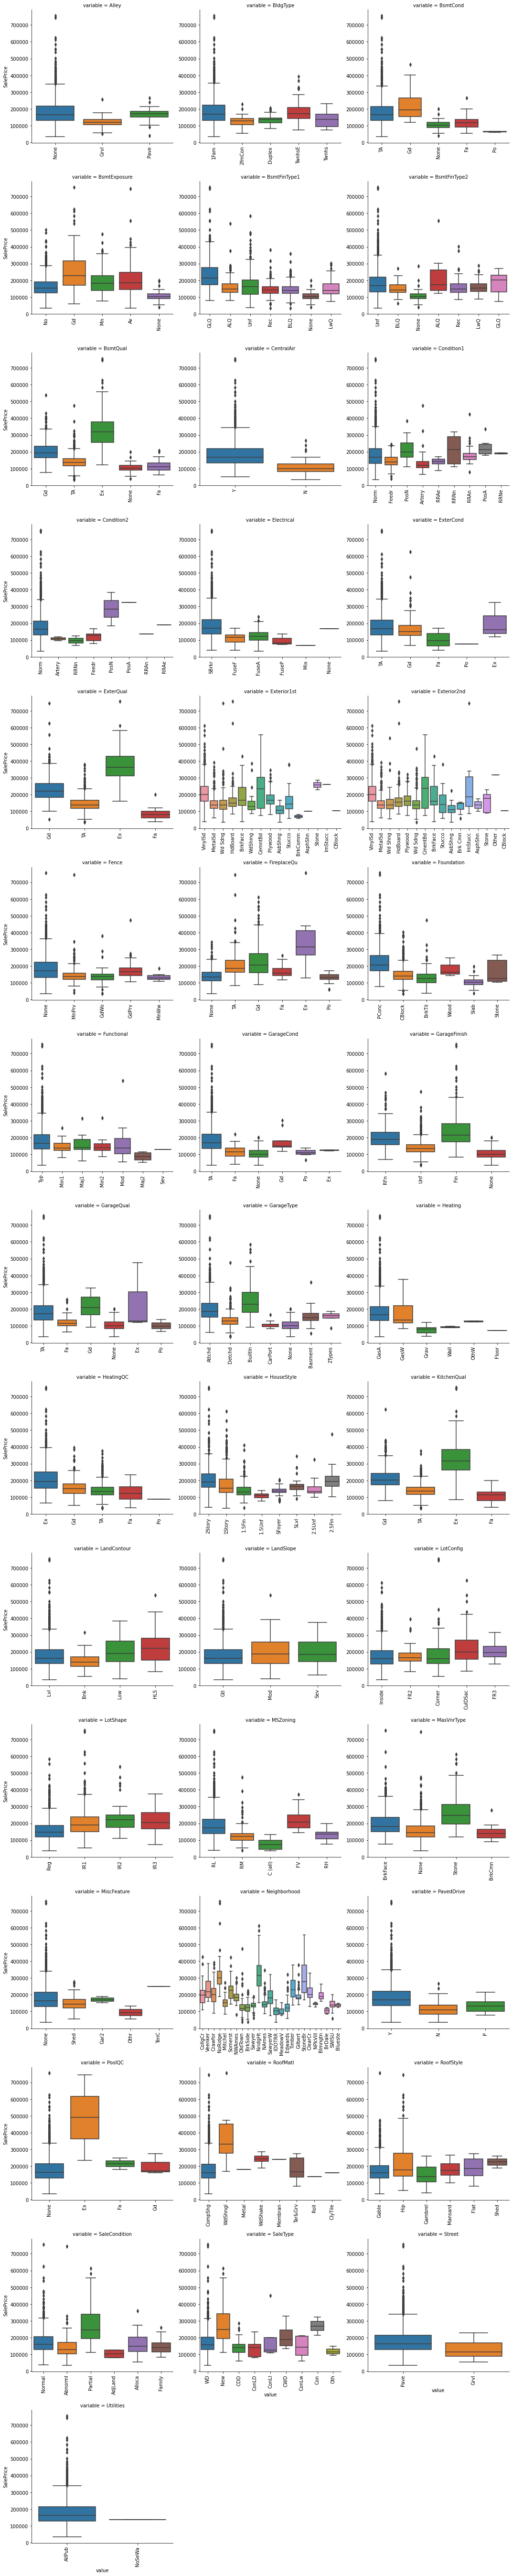

In [123]:
def plot_categorical_boxplots(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    plt.xticks(rotation=90)

categorical_columns = df.select_dtypes(include=['object'])
melted_df = pd.melt(df, id_vars=['SalePrice'], value_vars=sorted(df[categorical_columns.columns]))
grid = sns.FacetGrid(melted_df, col="variable", col_wrap=3, sharex=False, sharey=False, height=5)
grid.map(plot_categorical_boxplots, "value", "SalePrice")
plt.show()


- We address outliers in the feature engineering section by setting an upper limit based on a lower percentile.
- Insights from box plots indicate:
  - Properties with paved alleys tend to have higher prices.
  - Homes with good or excellent basement quality command higher prices.
  - Houses featuring good or excellent garages are associated with higher sale prices.
  - A positive correlation exists between good-quality kitchens and higher property prices.

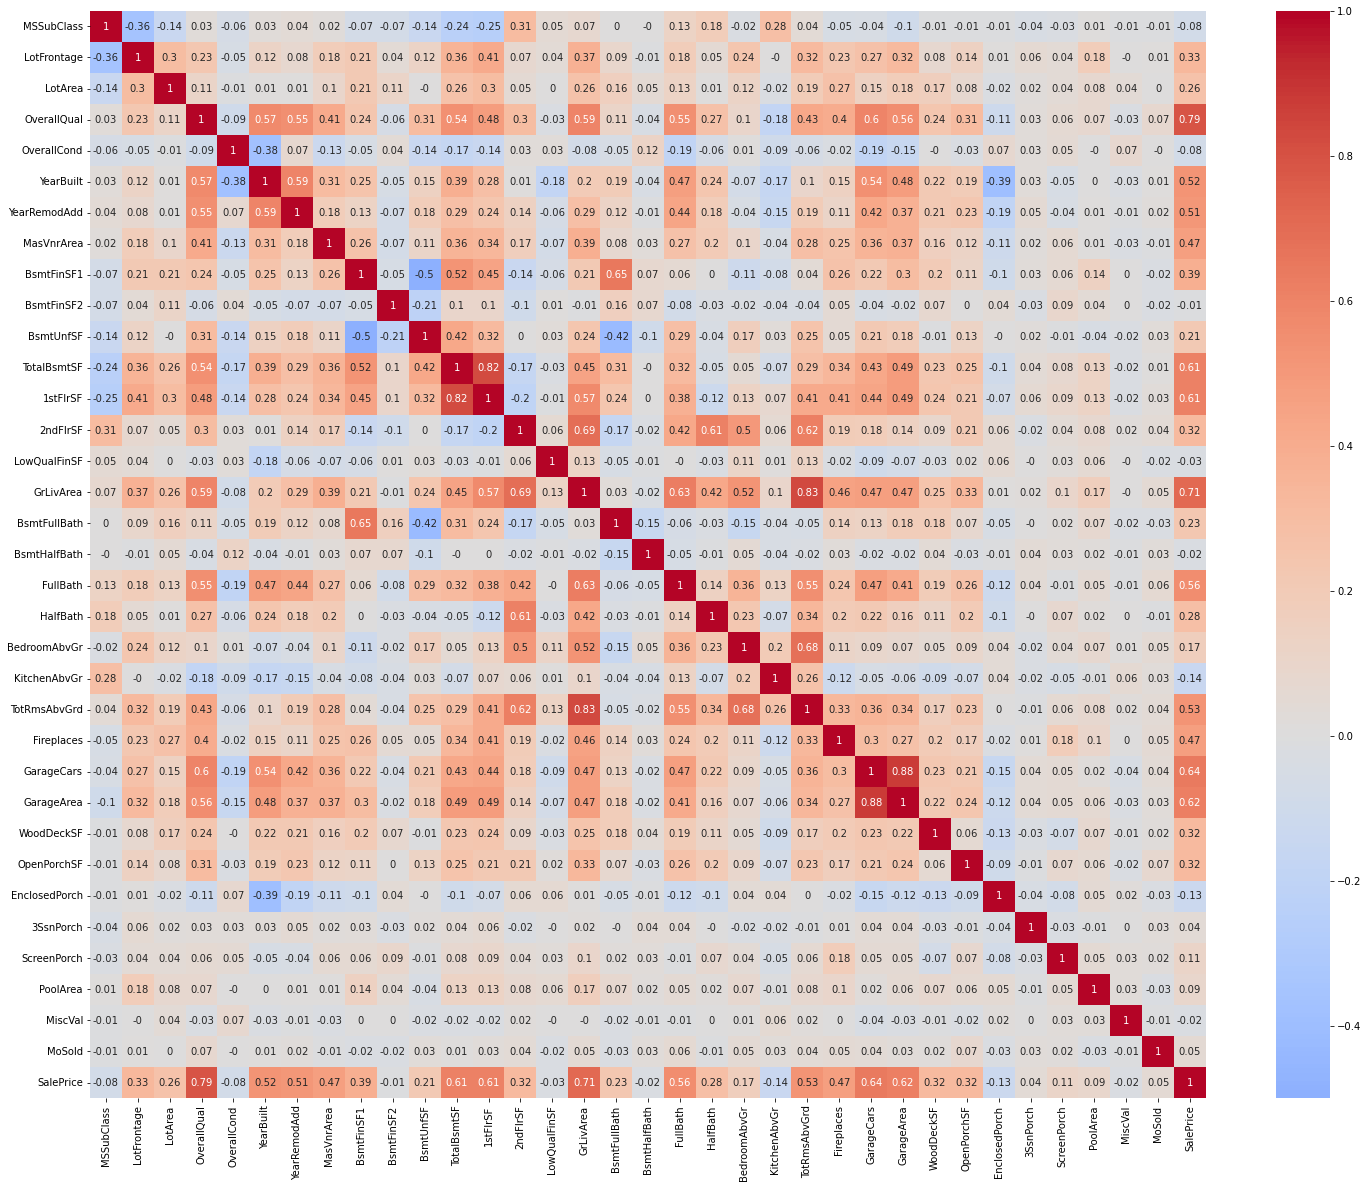

In [124]:
plt.subplots(figsize=(25, 20))

# Plotting heatmap of numerical features
sns.heatmap(round(df_num.corr(), 2), cmap='coolwarm', annot=True, center=0)

# Displaying the heatmap
plt.show()


In [125]:
# Creating new columns to determine the age of the property, garage, and remodel
df['age'] = df['YrSold'] - df['YearBuilt']
df['garage_age'] = df['YrSold'] - df['GarageYrBlt']
df['remodel_age'] = df['YrSold'] - df['YearRemodAdd']

# Dropping 'GarageYrBlt' column
df.drop('GarageYrBlt', axis=1, inplace=True)

# Converting years to strings as they are categorical features, not numerical
df[['MSSubClass']] = df[['MSSubClass']].astype(str)
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

df.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,age,garage_age,remodel_age
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,5,5,5
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,31,31,31
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,7,7,6
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,91,8,36
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,8,8,8


In [126]:
# Trying to remove redundant features
def redundant_feature(df):
    redundant = []
    for col in df.columns:
        counts = df[col].value_counts()
        count_max = counts.iloc[0]
        if count_max / len(df) * 100 > 99:
            redundant.append(col)
    return redundant

redundant_features = redundant_feature(df)
print("Redundant Features:", redundant_features)


Redundant Features: ['Street', 'Utilities', 'PoolArea', 'PoolQC']


In [127]:
# Dropping these features since they have more than 99% of a single category and thus play no part in the prediction

redundant_features = redundant_feature(df)
redundant_features

df.drop(redundant_features,axis=1,inplace=True)


In [128]:
def drop_outliers(data):
    outlier_cols = ['GrLivArea', 'GarageArea', 'TotalBsmtSF', 'LotArea']

    for col in outlier_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.99)
        IQR = Q3 - Q1
        data = data[(data[col] >= (Q1 - 1.5 * IQR)) & (data[col] <= (Q3 + 1.5 * IQR))]

    return data

df = drop_outliers(df)
df.shape


(1455, 78)

## Derived Features

In [129]:
df['YrBltAndRemod'] = df['YearBuilt'] + df['YearRemodAdd']
df['Total_sqr_footage'] = df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF']
df['Total_Bathrooms'] = df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath'])
df['Total_porch_sf'] = df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF']

num_col = []
cat_col = []
for i in df.columns:
    if df[i].dtypes != 'O':
        num_col.append(i)
    else:
        cat_col.append(i)

df_dummy = pd.get_dummies(df[cat_col])   
df = pd.concat([df, df_dummy], axis=1)
df = df.drop(cat_col, axis=1)
df.head()


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SalePrice,age,garage_age,remodel_age,YrBltAndRemod,Total_sqr_footage,Total_Bathrooms,Total_porch_sf,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_T

In [130]:
# Separating features (X) and target variable (y)
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Checking co-related features
corr = X.corr()
corr2 = corr.where(~np.tril(np.ones(corr.shape)).astype(np.bool))  # To remove repetition and 1 correlations
corr_result = corr2.stack()

# Displaying highly correlated features
highly_correlated_features = corr_result[abs(corr_result) > 0.6]
print(highly_correlated_features)

# Dropping columns with correlation greater than 0.6
columns_to_drop = [col[1] for col in highly_correlated_features.index]
X = X.drop(columns_to_drop, axis=1)


OverallQual           GarageCars               0.602025
                      YrBltAndRemod            0.628465
                      ExterQual_TA            -0.647338
YearBuilt             age                     -0.999036
                      YrBltAndRemod            0.931280
                                                 ...   
SaleType_New          SaleCondition_Normal    -0.644164
                      SaleCondition_Partial    0.986718
SaleType_WD           SaleCondition_Normal     0.632805
                      SaleCondition_Partial   -0.768294
SaleCondition_Normal  SaleCondition_Partial   -0.652835
Length: 152, dtype: float64


In [131]:
X.shape

(1455, 236)

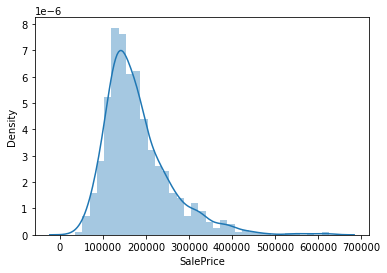

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

# Distribution of Target Variable before transformation
sns.distplot(y_train)
plt.show()


### Distribution of Target Variable after transformation

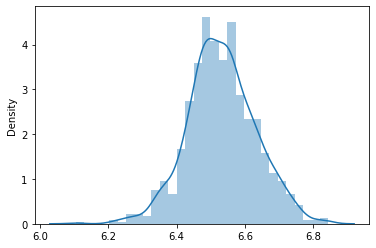

In [133]:
# Transforming the Target feature to make the data more Gaussian
pt = PowerTransformer(method='box-cox', standardize=False)
y_train = pt.fit_transform(y_train.to_frame())
y_test = pt.transform(y_test.to_frame())


sns.distplot(y_train)
plt.show()

# Scaling the data using a MinMax Scaler
scaler = MinMaxScaler()
X_train = DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = DataFrame(scaler.transform(X_test), columns=X.columns)


Fitting 11 folds for each of 28 candidates, totalling 308 fits


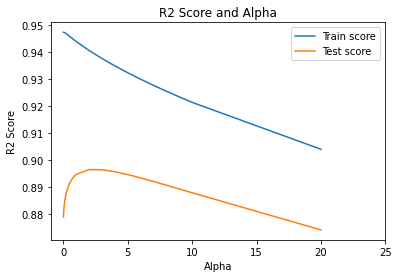

In [134]:
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

# List of alphas to tune
alphas = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]

# Ridge Regression
ridge = Ridge()

# Using RFE to find top 300 variables
rfe = RFE(estimator=Ridge(), n_features_to_select=300)
rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

# Cross-validation
folds = 11
model_cv = GridSearchCV(estimator=ridge, param_grid={'alpha': alphas}, scoring='r2', cv=folds, return_train_score=True, verbose=1)
model_cv.fit(X_train_rfe, y_train) 

# Results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha'] <= 30]

# Plotting mean test and train scores with alpha 
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['Train score', 'Test score'], loc='upper right')
plt.xticks(np.arange(0, 30, 5))
plt.show()


In [135]:
# Selecting the optimum alpha
optimal_alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is', optimal_alpha)

# Ridge Regression with the optimum alpha
ridge_final = Ridge(alpha=optimal_alpha)
ridge_final.fit(X_train_rfe, y_train)
ridge_coef = ridge_final.coef_
y_test_pred = ridge_final.predict(X_test_rfe)

# Model evaluation
print('The R2 Score on the test dataset for optimum alpha is', r2_score(y_test, y_test_pred))
print('The MSE on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

# Checking the VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
high_vif = vif[vif['VIF'] > 10]
high_vif


The optimum alpha is 2.0
The R2 Score on the test dataset for optimum alpha is 0.8616139941878265
The MSE on the test dataset for optimum alpha is 0.0014811192638693514


,Features,VIF
115,Exterior1st_VinylSd,inf
210,MoSold_12,inf
108,Exterior1st_CemntBd,inf
174,Functional_Maj2,inf
117,Exterior1st_WdShing,inf
214,MoSold_5,inf
213,MoSold_4,inf
109,Exterior1st_HdBoard,inf
116,Exterior1st_Wd Sdng,inf
212,MoSold_3,inf


In [136]:
# Dropping cols with high VIF
X_train_rfe2 = X_train_rfe.drop(high_vif.Features,axis=1)
X_test_rfe2 = X_test_rfe.drop(high_vif.Features,axis=1)

Fitting 11 folds for each of 28 candidates, totalling 308 fits


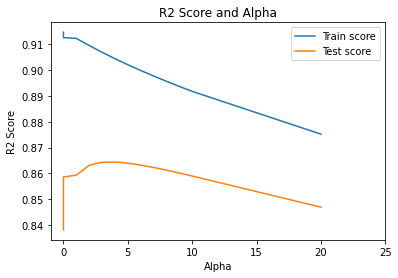

The optimum alpha is 4
The R2 Score on the test dataset for optimum alpha is 0.8400608834265956
The MSE on the test dataset for optimum alpha is 0.001711798134593436


In [137]:
#  Now we have all the columns which do not have from multicolinearity

# Building the second Ridge Model
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}
ridge = Ridge(random_state=100)

# Cross-validation
folds = 11
model_cv = GridSearchCV(estimator=ridge, param_grid=params, scoring='r2', cv=folds, return_train_score=True, verbose=1)
model_cv.fit(X_train_rfe2, y_train)

# Results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha'] <= 30]

# Plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# Plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['Train score', 'Test score'], loc='upper right')
plt.xticks(np.arange(0, 30, 5))
plt.show()

# Selecting the optimum alpha
optimal_alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is', optimal_alpha)

# Ridge Regression with the optimum alpha
ridge_final2 = Ridge(alpha=optimal_alpha, random_state=100)
ridge_final2.fit(X_train_rfe2, y_train)
ridge_coef2 = ridge_final2.coef_
y_test_pred2 = ridge_final2.predict(X_test_rfe2)

# Model evaluation
print('The R2 Score on the test dataset for optimum alpha is', r2_score(y_test, y_test_pred2))
print('The MSE on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred2))


# best features for house prediction

In [138]:
# Displaying the coefficients of the model
ridge_coeff2 = pd.DataFrame(np.atleast_2d(ridge_coef2), columns=X_train_rfe2.columns)
ridge_coeff2 = ridge_coeff2.T
ridge_coeff2.rename(columns={0: 'Ridge Coefficient'}, inplace=True)
ridge_coeff2.sort_values(by=['Ridge Coefficient'], ascending=False, inplace=True)
top_coefficients = ridge_coeff2.head(20)

# Displaying the top 20 coefficients
print(top_coefficients)


                      Ridge Coefficient
OverallQual                    0.113779
LotArea                        0.063340
BedroomAbvGr                   0.054564
WoodDeckSF                     0.035159
Neighborhood_StoneBr           0.034412
LotFrontage                    0.033568
OverallCond                    0.033491
BsmtQual_Ex                    0.032931
2ndFlrSF                       0.032502
Neighborhood_NoRidge           0.030125
OpenPorchSF                    0.029458
MSZoning_FV                    0.029117
Neighborhood_Crawfor           0.028786
Neighborhood_Veenker           0.026945
Fireplaces                     0.026692
YearRemodAdd                   0.025423
KitchenQual_Ex                 0.024421
MasVnrArea                     0.024128
BsmtFinType1_GLQ               0.021577
MSZoning_RL                    0.020685
